In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('insurance.csv')
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
raw_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
data_2 = raw_data.drop(['region'], axis = 1)

In [5]:
data_2.describe(include = 'all')

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN
top,NaN,male,NaN,NaN,no,NaN
freq,NaN,676,NaN,NaN,1064,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,16639.912515


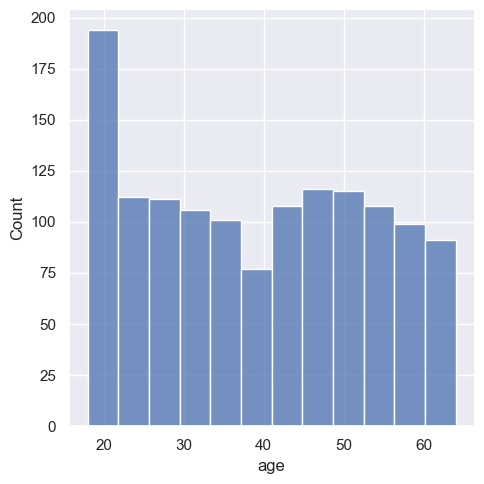

In [6]:
sn.displot(data_2['age'])

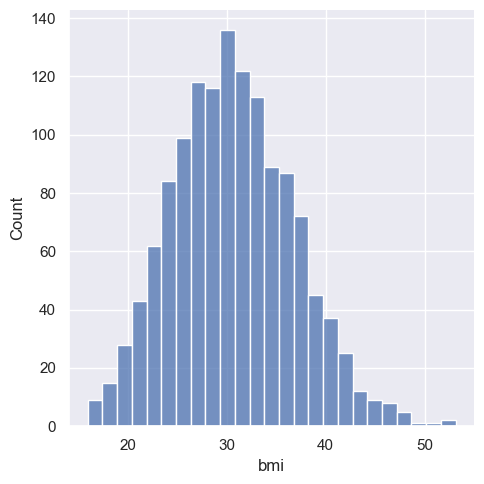

In [7]:
sn.displot(data_2['bmi'])

In [8]:
q = data_2['bmi'].quantile(0.99)
data_3 = data_2[data_2['bmi']<q]
data_3.describe(include='all')

,age,sex,bmi,children,smoker,charges
count,1324.000000,1324,1324.000000,1324.000000,1324,1324.000000
unique,NaN,2,NaN,NaN,2,NaN
top,NaN,male,NaN,NaN,no,NaN
freq,NaN,667,NaN,NaN,1053,NaN
mean,39.200151,NaN,30.476658,1.090634,NaN,13233.392011
std,14.057864,NaN,5.847942,1.203775,NaN,12012.709132
min,18.000000,NaN,15.960000,0.000000,NaN,1121.873900
25%,27.000000,NaN,26.220000,0.000000,NaN,4744.325050
50%,39.000000,NaN,30.275000,1.000000,NaN,9369.615750
75%,51.000000,NaN,34.430000,2.000000,NaN,16687.364100


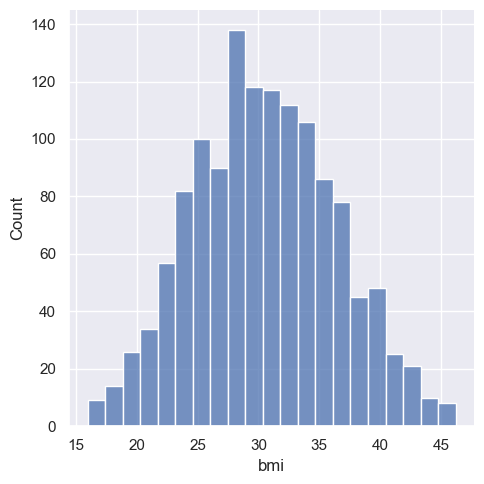

In [9]:
sn.displot(data_3['bmi'])

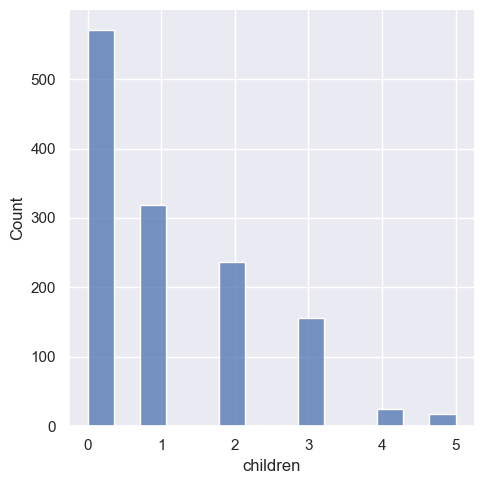

In [10]:
sn.displot(data_3['children'])

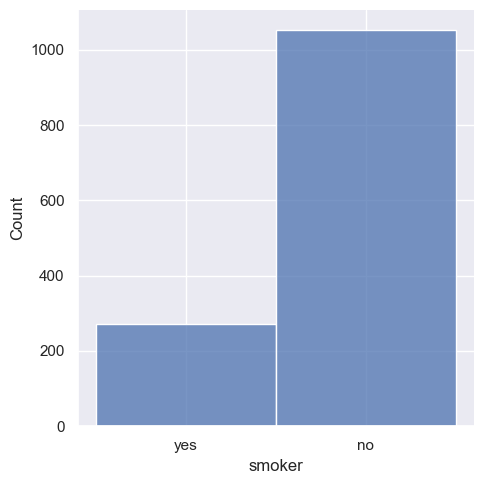

In [11]:
sn.displot(data_3['smoker'])

In [16]:
data_3['smoker'] = data_3['smoker'].map({'yes': 1, 'no': 0})


C:\Users\Kumar Abhinav\AppData\Local\Temp\ipykernel_6240\2222347978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['smoker'] = data_3['smoker'].map({'yes': 1, 'no': 0})


In [18]:
data_3.describe(include = 'all')

,age,sex,bmi,children,smoker,charges
count,1324.000000,1324,1324.000000,1324.000000,1324.000000,1324.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,667,NaN,NaN,NaN,NaN
mean,39.200151,NaN,30.476658,1.090634,0.204683,13233.392011
std,14.057864,NaN,5.847942,1.203775,0.403622,12012.709132
min,18.000000,NaN,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,NaN,26.220000,0.000000,0.000000,4744.325050
50%,39.000000,NaN,30.275000,1.000000,0.000000,9369.615750
75%,51.000000,NaN,34.430000,2.000000,0.000000,16687.364100


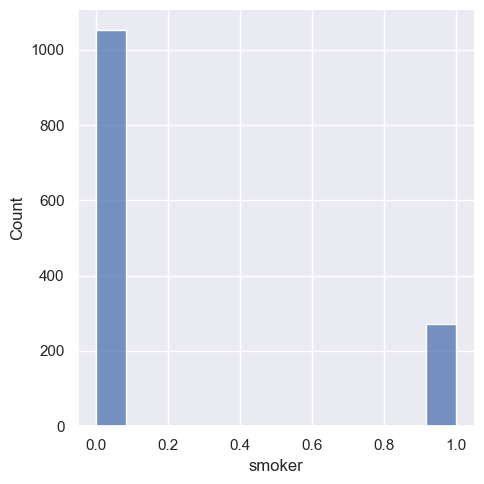

In [19]:
sn.displot(data_3['smoker'])

In [28]:
q = data_3['smoker'].quantile(0.99)
data_4 = data_3[data_3['smoker']<q]
data_4.describe(include='all')

,age,sex,bmi,children,smoker,charges
count,1053.000000,1053,1053.000000,1053.000000,1053.0,1053.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,female,NaN,NaN,NaN,NaN
freq,NaN,544,NaN,NaN,NaN,NaN
mean,39.374169,NaN,30.469677,1.084520,0.0,8445.995097
std,14.091383,NaN,5.800769,1.215191,0.0,6011.153060
min,18.000000,NaN,15.960000,0.000000,0.0,1121.873900
25%,27.000000,NaN,26.220000,0.000000,0.0,3987.926000
50%,40.000000,NaN,30.250000,1.000000,0.0,7345.084000
75%,52.000000,NaN,34.300000,2.000000,0.0,11362.755000


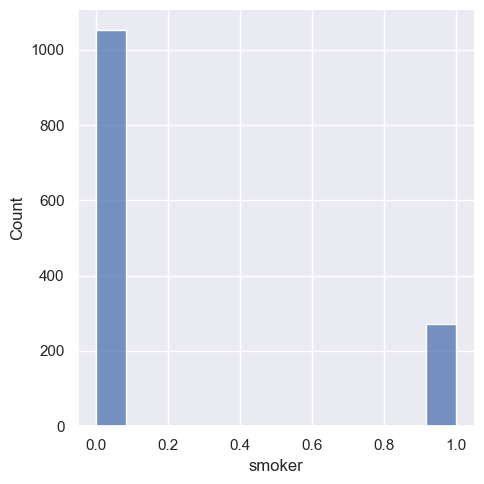

In [26]:
sn.displot(data_3['smoker'])

In [27]:
data_4.head(10)

,age,sex,bmi,children,smoker,charges
1,18,male,33.770,1,0,1725.55230
2,28,male,33.000,3,0,4449.46200
3,33,male,22.705,0,0,21984.47061
4,32,male,28.880,0,0,3866.85520
5,31,female,25.740,0,0,3756.62160
6,46,female,33.440,1,0,8240.58960
7,37,female,27.740,3,0,7281.50560
8,37,male,29.830,2,0,6406.41070
9,60,female,25.840,0,0,28923.13692
10,25,male,26.220,0,0,2721.32080


In [29]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head()

,age,sex,bmi,children,smoker,charges
0,18,male,33.770,1,0,1725.55230
1,28,male,33.000,3,0,4449.46200
2,33,male,22.705,0,0,21984.47061
3,32,male,28.880,0,0,3866.85520
4,31,female,25.740,0,0,3756.62160


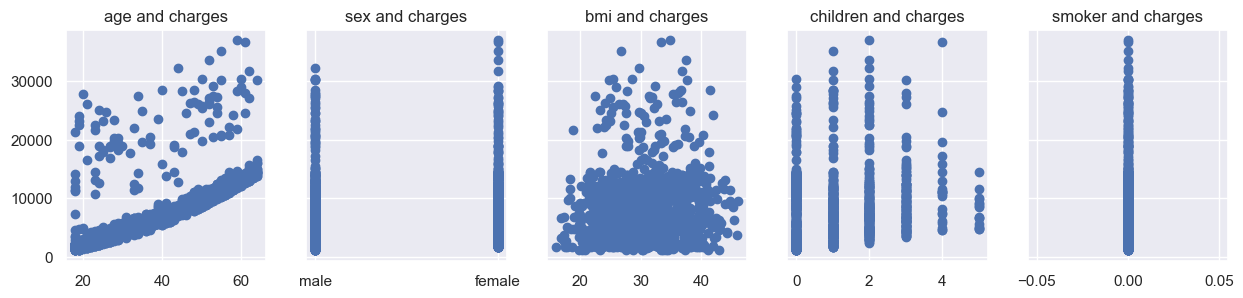

In [31]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['age'],data_cleaned['charges'])
ax1.set_title('age and charges')
ax2.scatter(data_cleaned['sex'],data_cleaned['charges'])
ax2.set_title('sex and charges')
ax3.scatter(data_cleaned['bmi'],data_cleaned['charges'])
ax3.set_title('bmi and charges')
ax4.scatter(data_cleaned['children'],data_cleaned['charges'])
ax4.set_title('children and charges')
ax5.scatter(data_cleaned['smoker'],data_cleaned['charges'])
ax5.set_title('smoker and charges')
plt.show()

In [33]:
new_data_reversed = data_cleaned[['age','bmi','smoker', 'charges']]

In [34]:
new_data_reversed.head(5)

,age,bmi,smoker,charges
0,18,33.770,0,1725.55230
1,28,33.000,0,4449.46200
2,33,22.705,0,21984.47061
3,32,28.880,0,3866.85520
4,31,25.740,0,3756.62160


C:\Users\Kumar Abhinav\AppData\Local\Temp\ipykernel_6240\3160176441.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(new_data_reversed['charges'])


<Axes: xlabel='charges', ylabel='Density'>

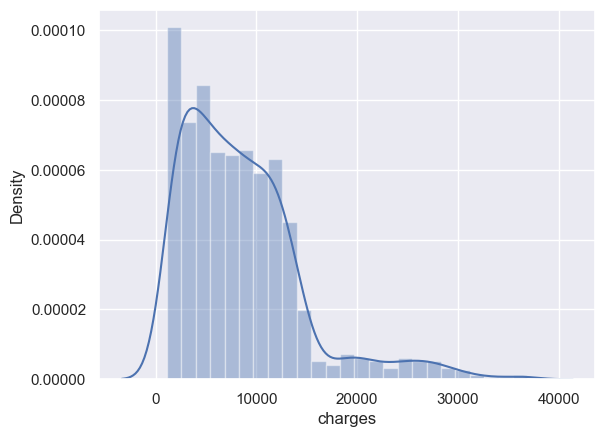

In [37]:
sn.distplot(new_data_reversed['charges'])

In [38]:
log_price = np.log(new_data_reversed['charges'])
new_data_reversed['cost'] = log_price
new_data_reversed


C:\Users\Kumar Abhinav\AppData\Local\Temp\ipykernel_6240\983129925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_reversed['cost'] = log_price


,age,bmi,smoker,charges,cost
0,18,33.770,0,1725.55230,7.453302
1,28,33.000,0,4449.46200,8.400538
2,33,22.705,0,21984.47061,9.998092
3,32,28.880,0,3866.85520,8.260197
4,31,25.740,0,3756.62160,8.231275
...,...,...,...,...,...
1048,52,44.700,0,11411.68500,9.342393
1049,50,30.970,0,10600.54830,9.268661
1050,18,31.920,0,2205.98080,7.698927
1051,18,36.850,0,1629.83350,7.396233


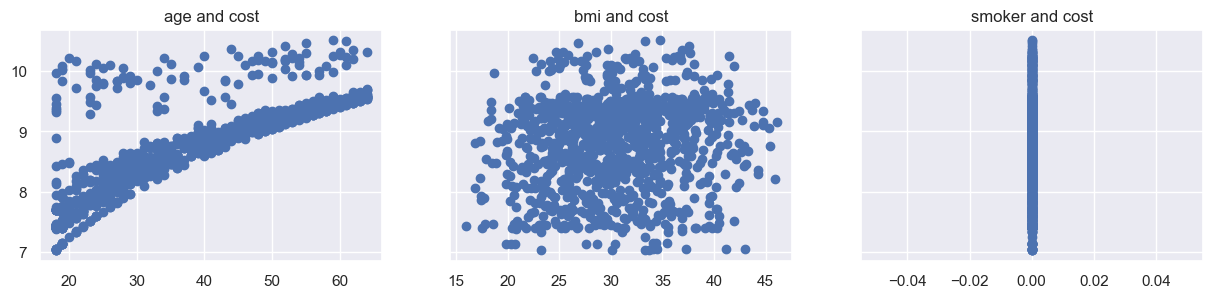

In [40]:
f, (ax1, ax3, ax5) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(new_data_reversed['age'],new_data_reversed['cost'])
ax1.set_title('age and cost')
ax3.scatter(new_data_reversed['bmi'],new_data_reversed['cost'])
ax3.set_title('bmi and cost')
ax5.scatter(new_data_reversed['smoker'],new_data_reversed['cost'])
ax5.set_title('smoker and cost')
plt.show()

In [42]:
new_data_reversed['cost']

0       7.453302
1       8.400538
2       9.998092
3       8.260197
4       8.231275
          ...   
1048    9.342393
1049    9.268661
1050    7.698927
1051    7.396233
1052    7.604867
Name: cost, Length: 1053, dtype: float64

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = new_data_reversed[['age','bmi','smoker','charges','cost']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

C:\Users\Kumar Abhinav\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [45]:
vif

,VIF,features
0,16.647965,age
1,28.173603,bmi
2,NaN,smoker
3,5.072995,charges
4,46.751169,cost


In [46]:
data_no_multicollinearity = new_data_reversed.drop(['smoker'],axis=1)

In [48]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.columns.values

array(['age', 'bmi', 'charges', 'cost'], dtype=object)

In [49]:
data_preprocessed = data_with_dummies

In [51]:
variables = data_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,16.647965,age
1,28.173603,bmi
2,5.072995,charges
3,46.751169,cost


In [55]:
data_with_dummies_new = pd.get_dummies(data_no_multicollinearity)#, drop_first=True)
data_with_dummies_new.head()

,age,bmi,charges,cost
0,18,33.770,1725.55230,7.453302
1,28,33.000,4449.46200,8.400538
2,33,22.705,21984.47061,9.998092
3,32,28.880,3866.85520,8.260197
4,31,25.740,3756.62160,8.231275


In [56]:
variables = data_with_dummies_new.drop(['cost'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,12.855775,age
1,7.832978,bmi
2,4.856687,charges


In [57]:
targets = data_preprocessed['cost']
inputs = data_preprocessed.drop(['cost'],axis=1)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [60]:
inputs_scaled = scaler.transform(inputs)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [62]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [63]:
reg.fit(x_train, y_train)

LinearRegression()

In [64]:
y_hat = reg.predict(x_train)

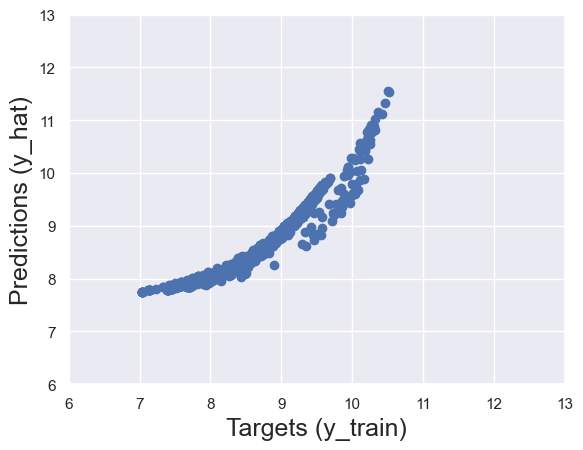

In [65]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Kumar Abhinav\AppData\Local\Temp\ipykernel_6240\2554649120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

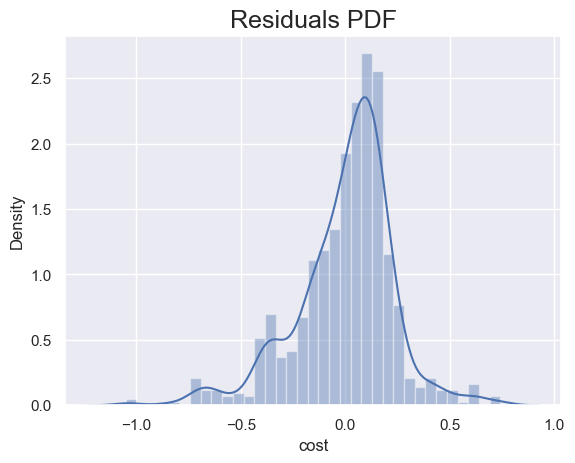

In [67]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sn.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [68]:
reg.score(x_train,y_train)

0.9034732705712909

In [69]:
## which is good model to predict prices gives 90 perc of aquaracy

In [70]:
reg.intercept_

np.float64(8.786574155778455)

In [71]:
reg.coef_

array([ 0.2814197 , -0.00445748,  0.49992647])

In [72]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,0.281420
1,bmi,-0.004457
2,charges,0.499926


In [73]:
## Predictions

In [74]:
y_hat_test = reg.predict(x_test)

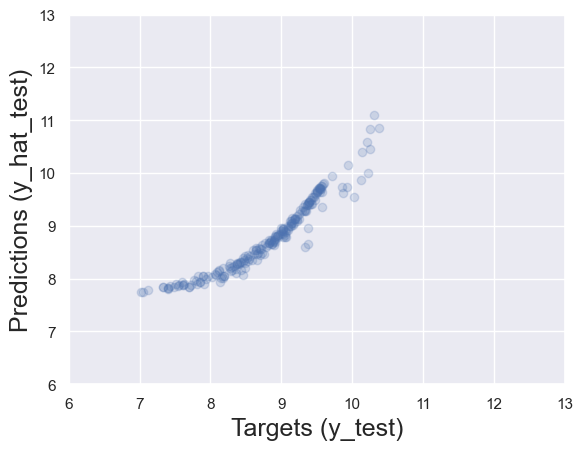

In [75]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [76]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,3472.992744
1,6176.987889
2,3661.616295
3,16630.438627
4,9807.890246


In [77]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3472.992744,NaN
1,6176.987889,NaN
2,3661.616295,NaN
3,16630.438627,NaN
4,9807.890246,NaN
...,...,...
206,4807.381820,7265.7025
207,10660.974261,NaN
208,2532.001137,NaN
209,2714.670100,9715.8410


In [78]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    8.121679
1    8.830158
2    8.280816
3    9.534676
4    9.218888
Name: cost, dtype: float64

In [79]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3472.992744,3366.66970
1,6176.987889,6837.36870
2,3661.616295,3947.41310
3,16630.438627,13831.11520
4,9807.890246,10085.84600
...,...,...
206,4807.381820,5836.52040
207,10660.974261,10825.25370
208,2532.001137,2211.13075
209,2714.670100,2055.32490


In [80]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [81]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3472.992744,3366.66970,-106.323044,3.158107
1,6176.987889,6837.36870,660.380811,9.658406
2,3661.616295,3947.41310,285.796805,7.240104
3,16630.438627,13831.11520,-2799.323427,20.239318
4,9807.890246,10085.84600,277.955754,2.755899
...,...,...,...,...
206,4807.381820,5836.52040,1029.138580,17.632742
207,10660.974261,10825.25370,164.279439,1.517557
208,2532.001137,2211.13075,-320.870387,14.511597
209,2714.670100,2055.32490,-659.345200,32.079853
